In [12]:
# import libraries and modules
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils

In [4]:
# Loading Fashion MNIST data and splitting it into training and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
# List of all labels from the dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

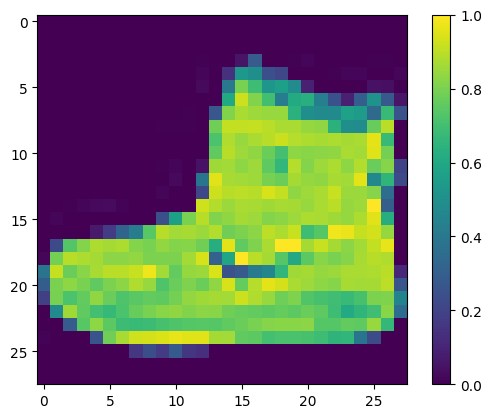

In [8]:
# Image of clothing from the dataset
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

In [7]:
# Normalization. Convert to range from 0 to 1
x_train = x_train / 255
x_test = x_test / 255

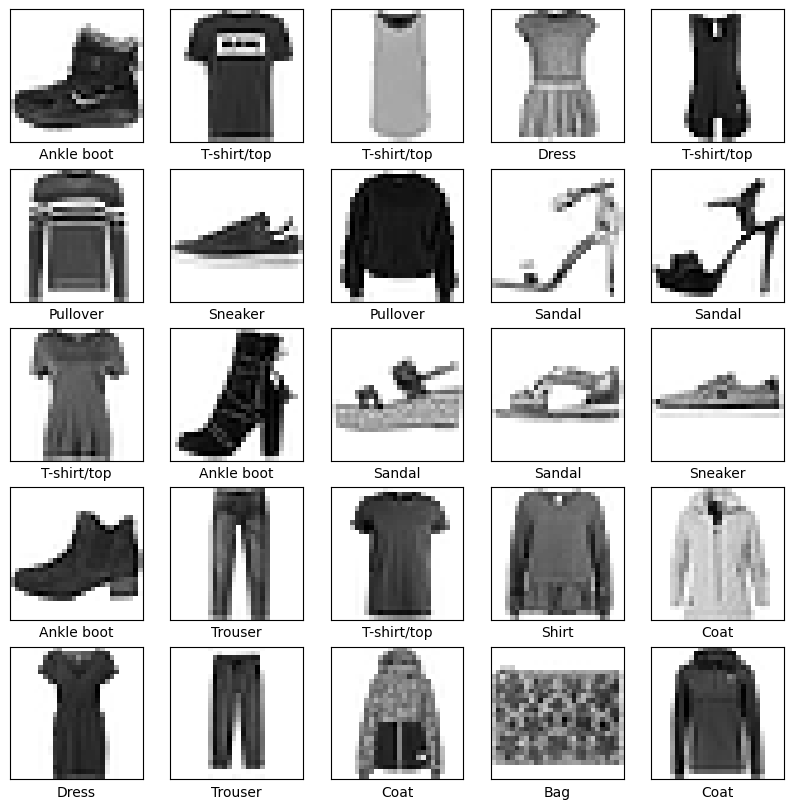

In [10]:
# Showing an images from a dataset
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])

In [11]:
# Create neural network model architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
# Setting up the optimizer, loss function and metrics
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7350 - accuracy: 0.7628
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5116 - accuracy: 0.8256
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4670 - accuracy: 0.8397
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4425 - accuracy: 0.8470
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4258 - accuracy: 0.8515
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4124 - accuracy: 0.8567
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4007 - accuracy: 0.8616
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3917 - accuracy: 0.8647
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3822 - accuracy: 0.8678
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.375

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy", test_acc)
print("Test loss", test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.4203 - accuracy: 0.8517
Test accuracy 0.8517000079154968
Test loss 0.4203474223613739


In [23]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [24]:
predictions[0]

array([1.1013013e-05, 1.1969463e-06, 8.5487054e-06, 1.6110522e-05,
       5.4863544e-06, 5.3295370e-02, 1.0361098e-04, 1.7847031e-01,
       2.7977542e-03, 7.6529068e-01], dtype=float32)

In [25]:
np.argmax(predictions[0])

9

In [26]:
y_train[0]

9

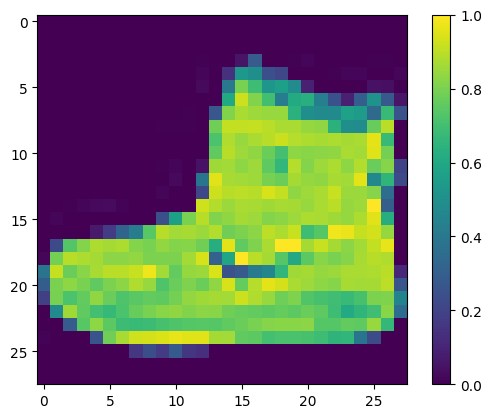

In [27]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

In [28]:
class_names[np.argmax(predictions[0])]

'Ankle boot'